Aluna: Ada Maris Pereira Mário - 12725432

Considere o problema do teste de dureza com uma esfera de aço, que é pressionada contra a superfície de um bloco de material a uma carga padrão. (Aula 3, slide 31).

Construa gráficos para o poder do teste, variando $\alpha$, $n$ e $H_1$, um por vez, fixados os demais.

# Bibliotecas

In [ ]:
# Mathematics
import math
import numpy as np
import random as rd

# Data and Graphs
import matplotlib.pyplot as plt
import matplotlib as mpl

# Statistics
from scipy import stats
import seaborn as sns
import pandas as pd

# Interactive plots
from ipywidgets import interact, interactive, fixed, interact_manual, Button, Layout
import ipywidgets as widgets
from IPython.display import display, Latex , HTML

# Dados da amostra do slide

In [ ]:
# Differences between diameters
differences = [2.3, 0.5, 1.4, -0.4, 2.6, -1.7, 0.9, 1.2, -2.3, 0.5]

# Shapiro-Wilk Test
stat, p_value = stats.shapiro(differences)

print("Test Statistic:", stat)
print("p-value:", p_value)

Test Statistic: 0.9423581957817078
p-value: 0.579539954662323


In [ ]:
diff_mean = np.mean(differences) # Mean value of the observed differences
diff_std = np.std(differences)/math.sqrt(10) # Standard deviation value of the observed differences
diff_var = np.var(differences)/10 # Variance value of the observed differences

print('Mean:', diff_mean)
print('Standard deviation:', round(diff_std,2))
print('Variance:', round(diff_var,2))

Mean: 0.5
Standard deviation: 0.48
Variance: 0.23


Como não iremos variar o desvio padrão, vamos fixar o valor da variância apontada acima, referente à amostra que nos foi fornecida no material de aula.

# Código para o gráfico

In [ ]:
# Variable and interactive settings
delta = widgets.FloatSlider(value=0.2, description='Diferença', max=5.0, min=-5.0,step=0.1)
alph = widgets.FloatSlider(value=0.05, description='α', max=.99, min=.01 , step=0.01)
n = widgets.IntSlider(value=10, description='n', max=100, min=1)

prop1 = widgets.Checkbox(value=True,    description='Proporção Gráfico t-Student',    disabled=False,    indent=True)
prop2 = widgets.Checkbox(value=True,    description='Proporção Gráfico Poder',    disabled=False,    indent=True)
rangex = widgets.IntSlider(value=6, description='Range', max=50, min=1)
altura = widgets.FloatSlider(value=.5, description='Altura', max=1, min=0)

ui = widgets.HBox([delta,alph,n])
ue = widgets.HBox([prop1,prop2,rangex,altura])

# Student's t Distribution and Power Function

def h(delta,alph,n,prop1,prop2,rangex,altura):

    prop=(n**.5)/diff_std
    c1='#35a4bd'
    c2='#8e43ba'
    mu0=0
    mu1=mu0+delta
    alt = -0.02*prop


    x = stats.t.ppf(1-alph,df=n-1,loc=mu0 ,scale=diff_std/(n**.5))
    beta = round(stats.t.cdf(x,df=n-1, loc=mu1 , scale=diff_std/(n**.5)) , 2)
    b=stats.t.ppf(1-beta,df=n-1,loc=mu1,scale=diff_std/(n**.5))
    a=stats.t.ppf(alph,df=n-1,loc=mu0,scale=diff_std/(n**.5))

    plt.figure(figsize=(12,5) , facecolor='#ebebeb')
    plt.subplot(1,2,1)
    plt.title(r'Distribuição t-Student: $\mu , \sigma^2 = %s, \nu = n-1$ - Amostra de tamanho %%s' %round(diff_var,2) %n)

    if prop1:
        lim1 = stats.t.ppf([.0001,.9999],df=n-1,loc=mu0, scale = diff_std/(n**.5))
        X = np.arange(lim1[0],lim1[1],0.01/prop)
    else:
        X = np.arange(-rangex,rangex,0.01/prop)
        plt.ylim([-0.05*prop,altura])

    C = stats.t.pdf(0,df=n-1,scale=diff_std/(n**.5))

    plt.plot([mu0]*2,[alt,C] ,':', color='k',alpha=0.2)
    plt.plot([mu0+delta]*2,[alt,C] ,':', color='k',alpha=0.2)
    plt.scatter(mu0,alt,marker='X',lw=0.25,color=c1 , label=r'$H_{_0}: \mu_0$ = %s' %float(mu0))
    plt.scatter(mu1,alt,marker='X',lw=.25,color=c2 , label=r'$H_{_1}: \mu_1$ = %s' %mu1)

    plt.plot([x,x],[alt,stats.t.pdf(x,df=n-1,loc=mu0,scale=diff_std/(n**.5))] ,'--', color='k',alpha=0.5, label=r'$\bar{x}_c = %s$' %round(x,2))

    plt.plot(X,stats.t.pdf(X ,df=n-1,loc=mu0 ,scale=diff_std/(n**.5)) , color=c1 , alpha=.8,lw=1.5)
    plt.fill_between(X,stats.t.pdf(X,df=n-1,loc=mu0, scale=diff_std/(n**.5)) ,color=c1,lw=1, alpha=0.2,where=(X>=x),label=r'$\alpha$ = %s' %alph )
    plt.plot(x,stats.t.pdf(x,df=n-1,loc=mu0, scale=diff_std/(n**.5)),'o',lw=0.25,color=c1,markerfacecolor='white')

    plt.plot(X+delta,stats.t.pdf(X+delta,df=n-1,loc=mu1 , scale=diff_std/(n**.5)) , color=c2 , alpha=.8,lw=1.5 )
    plt.fill_between(X+delta,stats.t.pdf(X+delta,df=n-1, loc=mu1 , scale=diff_std/(n**.5)),lw=0 ,color=c2, alpha=0.4,where=(X+delta<x),label=r'$\beta$ = %s' %beta )
    plt.fill_between(X+delta,stats.t.pdf(X+delta,df=n-1, loc=mu1 , scale=diff_std/(n**.5)) ,color=c2,facecolor='none',hatch='/',lw=0, alpha=0.7,where=(X+delta>x))
    plt.plot(x,stats.t.pdf(x,df=n-1,loc=mu1, scale=diff_std/(n**.5)),'o',color=c2,markerfacecolor='white')

    plt.legend(facecolor='w')



    #   PLOT 2 --------------------------------------------------------------

    plt.subplot(1,2,2)

    if prop2:
        lim2 = stats.t.ppf([.01,.99],df=n-1,loc=2*mu0-a,scale=diff_std/(n**.5))
        X = np.arange(lim2[0]-  1,lim2[1]+1,0.01/prop)
    else:
        X = np.arange(3-rangex,5+rangex,0.01/prop)

    plt.title(r'Função Poder - $\pi(\mu)$')

    plt.plot(X,stats.t.cdf(X,df=n-1,loc=2*mu0-a,scale=diff_std/(n**.5)) , color='#851818' , alpha=.8 , lw=2 )
    plt.plot(mu0+delta,stats.t.cdf(mu0+delta,df=n-1,loc=2*mu0-a,scale=diff_std/(n**.5)),color='#851818',marker='o',markersize=9,markerfacecolor='white' ,label=r'$\pi(%s)$ = %%s' %mu1 %round(1-beta ,4))

    plt.legend(facecolor='w')
    plt.tight_layout()
    plt.show()



# Plot Graphs
out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

Variando $H_1 = \Delta_0$

In [ ]:
delta = widgets.FloatSlider(value=-0.2, description='Diferença', max=5.0, min=-5.0,step=0.1)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

In [ ]:
delta = widgets.FloatSlider(value=0.5, description='Diferença', max=5.0, min=-5.0,step=0.1)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

In [ ]:
delta = widgets.FloatSlider(value=0.8, description='Diferença', max=5.0, min=-5.0,step=0.1)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

Variando $n$

In [ ]:
delta = widgets.FloatSlider(value=0.2, description='Diferença', max=5.0, min=-5.0,step=0.1)
alph = widgets.FloatSlider(value=0.05, description='α', max=.99, min=.01 , step=0.01)
n = widgets.IntSlider(value=20, description='n', max=100, min=1)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

In [ ]:
n = widgets.IntSlider(value=30, description='n', max=100, min=1)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

In [ ]:
n = widgets.IntSlider(value=50, description='n', max=100, min=1)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

In [ ]:
n = widgets.IntSlider(value=120, description='n', max=100, min=1)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

Variando $\alpha$

In [ ]:
delta = widgets.FloatSlider(value=0.2, description='Diferença', max=5.0, min=-5.0,step=0.1)
n = widgets.IntSlider(value=10, description='n', max=100, min=1)
alph = widgets.FloatSlider(value=0.01, description='α', max=.99, min=.01 , step=0.01)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

In [ ]:
alph = widgets.FloatSlider(value=0.07, description='α', max=.99, min=.01 , step=0.01)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

In [ ]:
alph = widgets.FloatSlider(value=0.1, description='α', max=.99, min=.01 , step=0.01)

ui = widgets.HBox([delta,alph,n])

out = widgets.interactive_output(h, {'delta':delta,'alph':alph,'n':n, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

## Versão Alternativa (Sem Plot Interativo)

In [ ]:
def power_function(mu0, mu1, sigma, alpha, sample_sizes):
    power_values = []

    for n in sample_sizes:
        critical_value = stats.t.ppf(1 - alpha/2, df=n-1)
        std_error = sigma / np.sqrt(n)
        rejection_region = critical_value * std_error
        beta = stats.t.cdf(rejection_region,df=n-1, loc=mu1, scale=std_error)
        power = 1 - beta
        power_values.append(power)

    return power_values

In [ ]:
# Parameters
mu0 = 0  # Mean difference under null hypothesis
mu1_values = [0.2, 0.5, 0.8]  # Mean difference under alternative hypothesis (varying)
sigma = diff_var  # Standard deviation (assumed equal for both cases)
alpha_values = [0.01, 0.05, 0.1]  # Significance levels
sample_sizes = range(10, 101, 10)  # Sample sizes

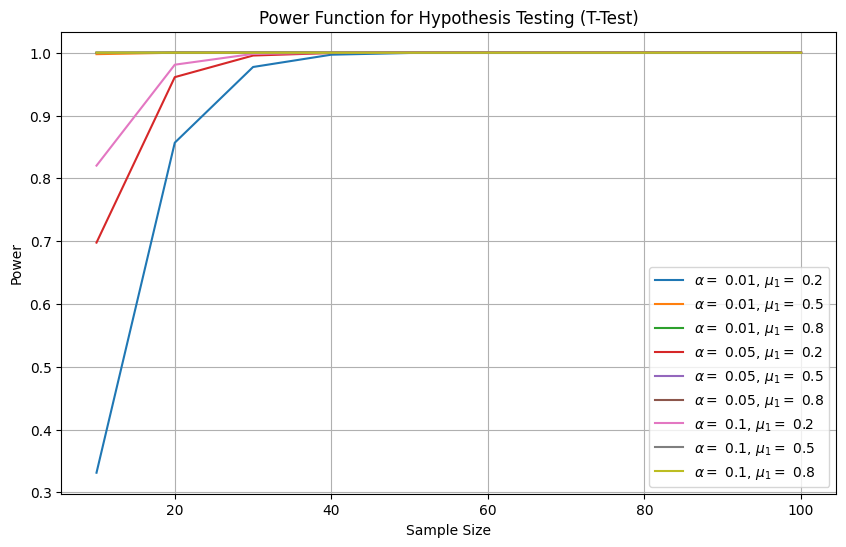

In [ ]:
# Calculate power values for different scenarios
power_results = {alpha: [] for alpha in alpha_values}
for alpha in alpha_values:
    for mu1 in mu1_values:
        power = power_function(mu0, mu1, sigma, alpha, sample_sizes)
        power_results[alpha].append(power)

# Plot the power function
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    for i, mu1 in enumerate(mu1_values):
        plt.plot(sample_sizes, power_results[alpha][i], label=r'$\alpha =$ {}, $\mu_1 =$ {}'.format(alpha, mu1))
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Function for Hypothesis Testing (T-Test)')
plt.legend()
plt.grid(True)
plt.show()
